### A Identification of Candidate Datasets

#### Dataset 1

- Dataset name and source –  H&M Personalized Fashion Recommendations Dataset, Kaggle
- Course topic alignment – Frequent itemsets and association rule mining
- Potential beyond-course techniques – User-CF and Item-CF not covered in lecture
- Dataset size and structure – Ex: 34G, transactions, articles and users informations,
- Data types – Ex: customer IDs, article ID, t_date, price,sales_channel_id
- Target variable(s), if any – None explicitly provided. 
- Licensing or usage constraints - Kaggle Custom License
  
- Course: association rule mining
- Beyond course: MMOE, item-CF, user-CF, embedding

#### Dataset 2

- Dataset name and source – MovieLens Dataset (MovieLens 1M / 10M), GroupLens Research, University of Minnesota
- Course topic alignment – Graph mining, bipartite user–item graphs, clustering
- Potential beyond-course techniques – Graph-based recommendation, matrix factorization, graph neural networks (GNNs)
- Dataset size and structure – Up to 10M user–item interactions, structured as a user–item bipartite graph with ratings and timestamps
- Data types – user IDs, movie IDs, ratings, timestamps, movie genres
- Target variable(s), if any – Rating prediction or implicit-feedback ranking; can also be formulated as a link prediction task
- Licensing or usage constraints – Open research and educational use
  
- Course: Graph mining
- Beyond course: GNN, matrix factorization

#### Dataset 3

- Dataset name and source – Amazon Product Co-purchasing Network Dataset, Stanford SNAP
- Course topic alignment – Graph mining, community detection, frequent subgraph patterns
- Potential beyond-course techniques – Graph-based recommendation, link prediction, graph neural networks (GNNs)
- Dataset size and structure – Hundreds of thousands of product nodes with millions of co-purchase edges, structured as an item–item graph
- Data types – product IDs, co-purchase edges, product category labels, review-based metadata 
- Target variable(s), if any – None explicitly provided; recommendation can be formulated as a link prediction or ranking task
- Licensing or usage constraints – Publicly available for research and educational use
  
- Course: Graph mining
- Beyond course: GNN

### B Comparative Analysis

Supported data mining tasks:
- H&M Dataset: Frequent itemsets and association rule mining (course), collaborative filtering and session-based recommendation (external)
- MovieLens data: Graph mining and clustering (course), graph-based recommendation and node embeddings (external)
- Amazon data: Graph mining and community detection on item–item networks (course), link prediction and graph neural networks (external)

Data quality issues:
- Extreme sparsity in user–item interactions; cold-start users and items; long-tail item distribution
- Rating sparsity; user activity imbalance
- Highly sparse graph; disconnected components

Algorithmic feasibility:
- Frequent itemset mining feasible with constraints; scalable recommendation methods required due to dataset size
- Graph algorithms feasible on medium-scale graphs; suitable for non-distributed or light distributed processing
- Large graph size may require efficient graph processing; full GNN training may be computationally expensive without sampling

Bias considerations:
- Strong popularity bias favoring frequently purchased items; active-user bias affecting recommendations
- User rating bias and popularity bias toward well-known movies
- Popular product bias amplifying already frequent co-purchased items
  
Ethical considerations: 

- Uses anonymized consumer transaction data; potential risk of reinforcing consumerism and popularity-driven exposure
- Minimal ethical risk due to anonymized user IDs; potential reinforcement of mainstream preferences
- Low direct personal risk; may amplify dominant products and reduce visibility of niche items

#### C Dataset Selection

Selected Dataset: H&M Personalized Fashion Recommendations

Reason:

- Directly supports recommendation system modeling through large-scale implicit user–item interaction data, aligning with course topics such as frequent itemsets, clustering, and graph mining.

- Naturally enables graph-based analysis, where user–item interactions can be represented as a bipartite graph, allowing the use of GraphX and other graph mining techniques covered in the course.

- Supports beyond-course techniques including collaborative filtering, matrix factorization, session-based recommendation, and graph neural networks.

- Provides a realistic industrial-scale setting, with highly sparse and long-tailed user–item interactions, making it suitable for studying bias, cold-start issues, and scalability.

Trade-offs

- No explicit target variable, requiring the recommendation task to be formulated as an implicit-feedback or ranking-based problem rather than standard supervised learning.

- Limited natural language content, as product descriptions and reviews are minimal, restricting text-based modeling.

- Severe sparsity and popularity bias, which may favor popular items and active users unless explicitly addressed in modeling and evaluation.

#### D EDA

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

path = 'data/'
art = f'{path}articles.csv'
cus = f'{path}customers.csv'
train = f'{path}transactions_train.csv'
sub = f'{path}sample_submission.csv'

In [4]:
df = pd.read_csv(train,dtype= {'customer_id':str, 'article_id':str}, parse_dates = ['t_dat'])
df.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2


In [5]:
df_art = pd.read_csv(art,dtype = {'article_id':str})
df_art.head(5)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
df_cus = pd.read_csv(cus,dtype= {'customer_id':str})
df_cus.head(5)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [7]:
#MAPPING
ALL_CUSTOMERS = df['customer_id'].unique().tolist()
ALL_ARTICLES = df['article_id'].unique().tolist()

CUSTOMER_TO_USER = {cus:u for u, cus in enumerate(ALL_CUSTOMERS)}
USER_TO_CUSTOMER = {cus:u for cus,u in enumerate(ALL_CUSTOMERS)}

ARTICLE_TO_ITEM = {art: i for i, art in enumerate(ALL_ARTICLES)}
ITEM_TO_ARTICLE = {art: i for art, i in enumerate(ALL_ARTICLES)}

df['user_id'] = df['customer_id'].map(CUSTOMER_TO_USER)
df['item_id'] = df['article_id'].map(ARTICLE_TO_ITEM)

In [8]:
df.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,user_id,item_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2,0,0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2,0,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2,1,2


In [9]:
user_cnt = df.groupby('user_id').size()
user_cnt.describe()


count    1.362281e+06
mean     2.333463e+01
std      3.924225e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.700000e+01
max      1.895000e+03
dtype: float64

User interaction counts exhibit a highly skewed distribution, with most users having very few transactions and a small number of highly active users.

In [11]:
item_cnt = df.groupby('item_id').size()
item_cnt.describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
dtype: float64

Item interaction counts exhibit a highly skewed distribution. While the average item appears in approximately 304 transactions, the median is only 65, indicating a strong long-tail effect. A large fraction of items are purchased only a few times, whereas a small number of popular items dominate the interaction volume.

In [28]:
#gender
from tqdm import tqdm
tqdm.pandas()

def set_gender_flag(x):
    female_types = [
        "Bra",
        "Underwear Tights",
        "Leggings/Tights",
        "Hair clip",
        "Hair string",
        "Hair/alice band",
        "Bikini top",
        "Skirt",
        "Dress",
        "Earring",
        "Alice band",
        "Straw hat",
        "Necklace",
        "Ballerinas",
        "Blouse",
        "Beanie",
        "Giftbox",
        "Pumps",
        "Bootie",
        "Heeled sandals",
        "Nipple covers",
        "Hair ties",
        "Underwear corset",
        "Bra extender",
        "Underdress",
        "Underwear set",
        "Sarong",
        "Leg warmers",
        "Hairband",
        "Tote bag",
        "Earrings",
        "Flat shoes",
        "Heels",
        "Cap",
        "Shoulder bag",
        "Headband",
        "Baby Bib",
        "Cross-body bag",
        "Bumbag"]
    x['gender'] = 0
    if x['index_group_name'] == 'Ladieswear':
        x['gender'] = 2
    elif x['index_group_name'] == 'Menswear':
        x['gender'] = 1
    else:
        if x['product_type_name'] in female_types:
            x['gender'] = 2
    return x
        

In [30]:
df_art = df_art.progress_apply(set_gender_flag,axis = 1)

100%|████████████████████████████████| 105542/105542 [00:02<00:00, 49878.55it/s]


In [34]:
df['YYYY_MM'] = df['t_dat'].dt.year.astype(str) + '_' + df['t_dat'].dt.month.astype(str)
df = pd.merge(df,df_art[['article_id','gender','product_type_name']],on = 'article_id',how = 'left')
df = pd.merge(df,df_cust[['customer_id','postal_code']],on = 'customer_id', how = 'left')


There is a label for df_art: 'index_name'('Ladieswear'/'Menswear') can differ for articles for men/women
But some keywords can also do that, we set 0,1,2 to identify not divided, male, and female
merge information into the transaction dataframe. So we can calculate the ratio of gender for every customer

In [36]:
#
ttl_cnt = df.groupby('customer_id').size().reset_index(name = 'ttl_cnt')
gender_sale = df.groupby(['customer_id','gender']).size().reset_index(name = 'cnt')
gender_sale = gender_sale.merge(ttl_cnt, on = 'customer_id',how = 'left')
gender_sale['ratio'] = gender_sale['cnt']/gender_sale['ttl_cnt']

gender_sale= pd.pivot_table(gender_sale, values = 'ratio', index = 'customer_id', columns=['gender'])
gender_sale = gender_sale.reset_index()
gender_sale = gender_sale.fillna(0)

gender_sale['gender'] = 0
gender_sale.loc[gender_sale[1] >= 0.8, 'gender'] = 1
gender_sale.loc[gender_sale[2] >= 0.8, 'gender'] = 2


<Axes: >

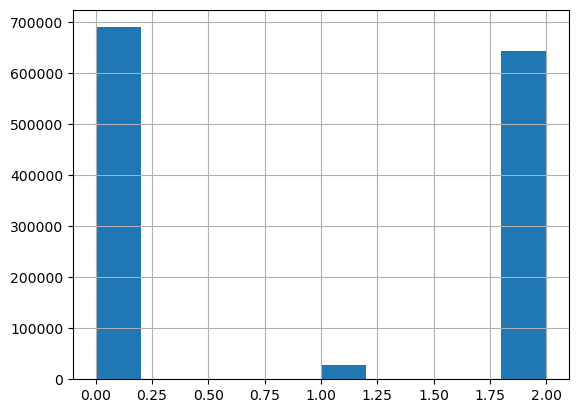

In [37]:
gender_sale['gender'].hist()

In [44]:
#distribution of basket sized
basket = df.groupby(['user_id','t_dat']).size().reset_index(name = 'basket_size')
basket.head()

,user_id,t_dat,basket_size
0,0,2018-09-20,2
1,0,2018-09-24,1
2,0,2019-03-01,1
3,0,2020-02-03,3
4,0,2020-04-01,2


In [48]:
basket_dist = basket['basket_size'].value_counts().sort_index()
print(basket_dist.head(20))

basket_size
1     2687043
2     2120525
3     1308634
4      883951
5      553178
6      399711
7      266072
8      202448
9      142411
10     110730
11      80094
12      65247
13      48386
14      39852
15      30360
16      25053
17      18956
18      16580
19      12575
20      11153
Name: count, dtype: int64


In [54]:
basket['basket_size'].describe()

count    9.080179e+06
mean     3.500848e+00
std      3.619618e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      5.700000e+02
Name: basket_size, dtype: float64

In [73]:
#sparsity of item co-occurrence
from itertools import combinations
from collections import Counter

pair_counter = Counter()
groups = df.groupby(['user_id','t_dat'])
for _,g in tqdm(groups,total=groups.ngroups):
    items = g['item_id'].unique()
    for i, j in combinations(sorted(items),2):
        pair_counter[(i,j)] += 1
        


100%|██████████████████████████████| 9080179/9080179 [05:07<00:00, 29514.60it/s]


In [74]:
# number of nonzero co-occurring item pairs
nnz_pairs = len(pair_counter)

# number of unique items
n_items = df['item_id'].nunique()

# total possible pairs (upper triangle of item-item matrix)
total_pairs = n_items * (n_items - 1) / 2

density = nnz_pairs / total_pairs
sparsity = 1 - density

print(f"density: {density},sparsity: {sparsity}")

density: 0.0077533703081773195,sparsity: 0.9922466296918226


#### E Initial Insights and Direction

Gender Purchase Concentration
Observation 
Many users show ≥80% purchase concentration in one gender category.

Hypothesis
Gender preference is a strong behavioral signal and can be used as a filtering or cold-start feature in recommendation.

Basket Size Distribution
Observation 
Basket sizes are highly right-skewed, with median = 2 and mean ≈ 3.5. Most transactions contain only 1–4 items, while a small number of baskets are extremely large.

Hypothesis
Most purchases are goal-driven rather than exploratory. Small baskets reduce co-occurrence signal strength, while very large baskets may dominate pair counts. Basket size capping may improve co-occurrence quality.

Item Co-occurrence Sparsity
Observation 
The item–item co-occurrence matrix has sparsity ≈ 99.2%, meaning only a tiny fraction of item pairs ever appear together.

Hypothesis
Dense similarity matrices are infeasible. Recommender models should rely on sparse structures, top-K neighbor pruning, or embedding-based retrieval.

Potential RQs:

How does basket size affect co-occurrence reliability?

Do very large baskets introduce noise or bias in item co-occurrence counts?

Should basket size be capped when building item similarity models?

Do rules mined from small baskets differ in quality from rules mined from large baskets?

#### F GitHub Portfolio Building

https://github.com/Wolke926/CSCE-676-data-mining-project

On my honor, I declare the following resources:
1. Collaborators:/
2. Web Sources:/
3. AI Tools: ChatGPT: asked it to help provide ideas for EDA and analysis, data comparison